# 옷 분류기 예제

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from termcolor import colored

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [15]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [19]:
print(f"{train_images.shape}\n{test_images.shape}")

(60000, 28, 28)
(10000, 28, 28)


## 예제 데이터의 클래스 확인
- 레이블  /  클래스
  - 0 : T-shirt/top
  - 1 : Trouser
  - 2 : Pullover
  - 3 : Dress
  - 4 : Coat
  - 5 : Sandal
  - 6 : Shirt
  - 7 : Sneaker
  - 8 : Bag
  - 9 : Ankle boot

In [20]:
# 레이블과 클래스를 매핑하는 변수 생성
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag,', 'Ankle boot']

## 데이터 전처리

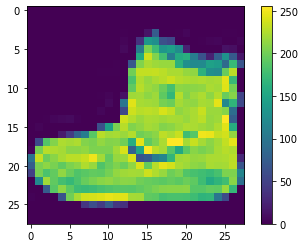

In [21]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [22]:
# 모델이 갖는 컬러 채널 깊이가 255이므로 범위를 조정
## 0~1로 조정해야하므로, 255로 나눔 ( 최대 256 이므로 )
train_images = train_images/255.0
test_images = test_images/255.0

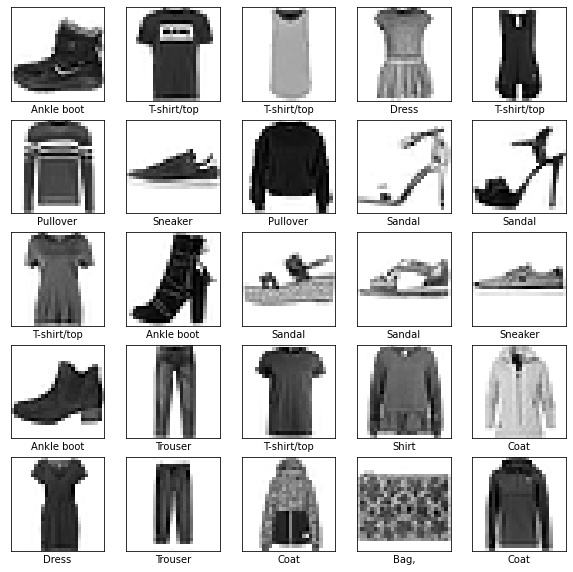

In [25]:
plt.figure(figsize=(10, 10), facecolor='white')
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성
모델의 층을 구성한 후, 모델 컴파일(학습방향 설정)

### Layer 구성 ( 층 구성 ) 

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)])

- 위 모델링 코드의 첫 번째 층 Flatten()은 (28, 28)의 2차원 배열을 784 픽셀의 1차원 픽셀로 변환한다.
- Flatten 층에서는 학습되는 가중치가 없음

- Dense 층을 밀집 연결층이라고 한다. 
- 첫 번째 Dense층은 128개의 뉴런(노드)를 가지는 ReLu층.
- 두 번째 층은 10개의 뉴런을 갖는 소프트맥스 층. 소프트맥스 층은 10개의 확률을 반환하고 확률의 합은 1이다. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력한다.

### 모델 컴파일 ( 학습방향 설정 )
- 손실 함수
  - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 조정하려면 이 함수를 최소화해야 합니다.
- 옵티마이저
  - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.
- 메트릭 ( metrics )
  - 훈련 및 테스트 단계를 모니터링하는 데 사용. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용

In [33]:
model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

## 모델 학습

In [34]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4965 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3766 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3363 - accuracy: 0.8783
Epoch 4/

## 정확도 평가

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy:', test_acc)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 1s - loss: 0.3361 - accuracy: 0.8796 - 857ms/epoch - 3ms/step

Test Accuracy: 0.8795999884605408


- 트레인 세트의 정확도 0.91, 테스트 세트의 정확도 0.87.
- 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 경우 과대적합으로 볼 수 있음 (overfitting)

## 예측하기
훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있음.

모델과 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환함.

In [40]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [41]:
predictions = probability_model.predict(test_images)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 0s 1ms/step


In [42]:
predictions[0]

array([2.3620200e-06, 5.7415912e-11, 2.1061821e-08, 2.9251861e-09,
       3.5359733e-09, 1.8003961e-03, 1.2839246e-07, 4.1853931e-02,
       8.2396735e-07, 9.5634240e-01], dtype=float32)

In [45]:
# test_images의 첫 번째 데이터의 클래스와 모델이 예측한 클래스 비교
print('비교 결과 :', np.argmax(predictions[0]) == test_labels[0])

비교 결과 : True


### 비교 결과 시각화

In [66]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label :
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):0.2f}% {class_names[true_label]}", color=color)

In [67]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

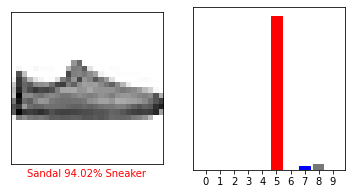

In [76]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

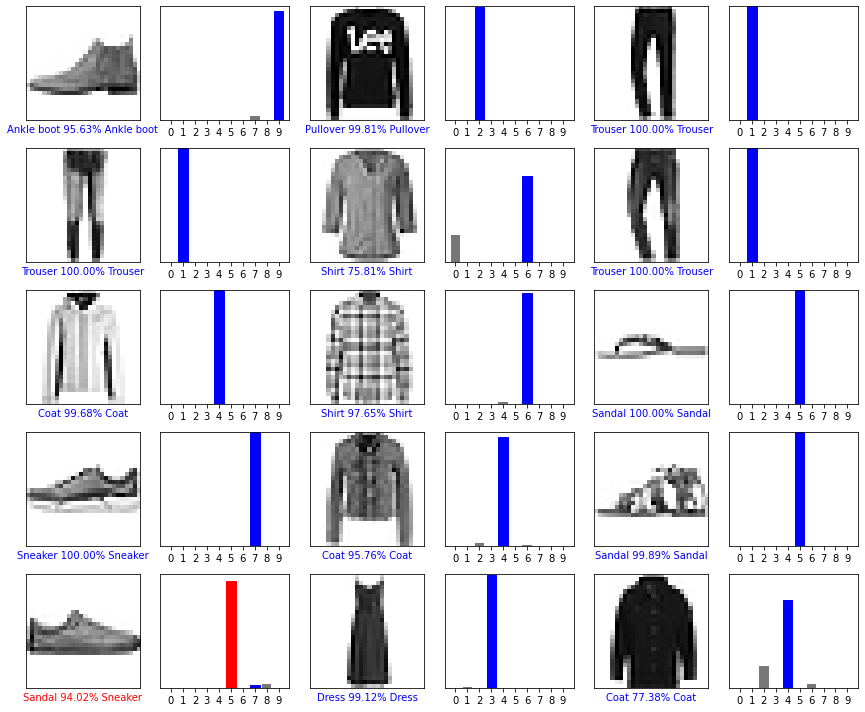

In [78]:
# 모델의 예측값과 test_label이 일치하면 blue, 일치하지 않으면 red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [83]:
img = test_images[1]
print(img.shape)

(28, 28)


In [84]:
# Keras 모델은 샘플 묶음으로 예측을 만들기에 최적화되어있으므로
# 하나의 이미지를 사용할 때에도 2차원 배열로 만들어서 사용
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [86]:
# Keras.Model.predict()는 데이터 배치의 각 이미지에 대해 예측 클래스를 반환
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[2.5738704e-05 1.3895279e-11 9.9814939e-01 2.0570939e-11 1.6906857e-03
  2.3105249e-11 1.3419671e-04 4.9739363e-15 9.6125130e-10 3.4062429e-16]]


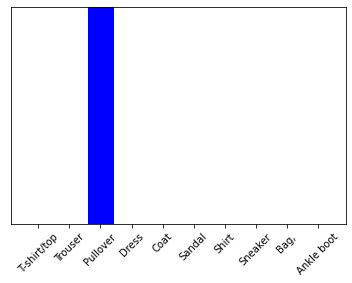

In [87]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [91]:
np.argmax(predictions_single[0]) == test_labels[1]

True